# Hypothesis Testing Exercises

 ## Overview Exercises
 ***For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.***

- **1. Has the network latency gone up since we switched internet service providers?**


- H<sub>o</sub> : There is no difference on network latency since switching ISPs
- H<sub>*a*</sub> : Switching ISPs has increased network latency


- True Positive: Switching ISPs **has** affected latency and we **rejected** H<sub>o</sub> in testing
- True Negative: Switching ISPs **has not** affected latency and we **accepted** H<sub>o</sub> in testing
- Type I Error:  Switching ISPs **has not** affected latency but we **rejected** H<sub>o</sub> in testing
- Type II Error: Switching ISPs **has** affecetd latency but we **accepted** H<sub>o</sub> in testing

- **2. Is the website redesign any good?**

- H<sub>o</sub> : The website redesign has had no impact on the average time users spend on the website
- H<sub>*a*</sub> : The website redesign has increased the average time users spend on the website


- True Positive: Redesign **has** increased avg user time and we **rejected** H<sub>o</sub> in testing
- True Negative: Redesign **has not** increased avg user time and we **accepted** H<sub>o</sub> in testing
- Type I Error:  Redesign **has not** increased avg user time but we **rejected** H<sub>o</sub> in testing
- Type II Error: Redesign **has** increased avg user time but we **accepted** H<sub>o</sub> in testing

- **3. Is our television ad driving more sales?**

- H<sub>o</sub> : Sales have not increased after airing our TV ad
- H<sub>*a*</sub> : Sales have increased since airing our TV ad 


- True Positive: Sales **have** increased and we **rejected** H<sub>o</sub> in testing
- True Negative: Sales  **have not** increased and we **accepted** H<sub>o</sub> in testing
- Type I Error:  Sales **have not** increased but we **rejected** H<sub>o</sub> in testing
- Type II Error: Sales **have** increased but we **accepted** H<sub>o</sub> in testing

## T-test Exercises

In [10]:
from math import sqrt
from scipy import stats
from scipy.stats import ttest_ind_from_stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
#List the data we have 

#Avg time it takes each office to sell homes
office_1_mean = 90
office_2_mean = 100

#Stdev for the avg time it takes to sell homes 
office_1_sd = 15
office_2_sd = 20

In [149]:
#Setup the test and set the confidence level
null_hypothesis = "There is no difference in average time for selling homes between the two Ace Realty offices"
alt_hypothesis = "There is a difference in avg time for selling homes"
confidence_level = .95
a = 1 - confidence_level

In [152]:
#Use scipy to conduct the t-test
t, p = stats.ttest_ind_from_stats(office_1_mean, office_1_sd, 40, office_2_mean, office_2_sd, 50)
t, p

(-2.6252287036468456, 0.01020985244923939)

In [151]:
if p > a:
    print(f"{null_hypothesis}")
else:
    print(f"Reject the null hypothesis. {alt_hypothesis}.")

Reject the null hypothesis. There is a difference in avg time for selling homes.


### Load the mpg dataset and use it to answer the following questions:

In [153]:
from pydataset import data
mpg = data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- **Is there a difference in fuel-efficiency in cars from 2008 vs 1999?**

In [174]:
#Prepare the data:

#Step 1: Calculate the avg mpg
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

#Note from demo: In the future, when dealing with rates(ratios) like mpg, I may want to use harmonic mean instead of arithmatic mean

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_of_car,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [175]:
#Step 2: Classify vehicles by the years 2008 and 1999
cars_from_99 = mpg[mpg.year == 1999]
cars_from_08 = mpg[mpg.year == 2008] 

In [176]:
#Setup the test and set the confidence level
null_hypothesis = "There is no difference in fuel-efficiency in cars from 2008 vs 1999"
alt_hypothesis = "There is a difference in fuel-efficiency in cars from 2008 vs 1999"

confidence_level = .95
a = 1 - confidence_level

In [177]:
#Use ttest_ind for a two sample t-test
t, p = stats.ttest_ind(cars_from_99.avg_mpg,cars_from_08.avg_mpg)
t, p

(0.21960177245940962, 0.8263744040323578)

In [178]:
#Use a two-tailed test
if p < a: 
    print("Reject the null hypothesis that there is no difference in fuel-efficiency")
    print("Move forward with the understanding that there is a difference in efficiency between cars from 1999 and 2008")
else:
    print("Fail to reject the null hypothesis.")
    print("Not enough evidence to support a difference in fuel-efficiency.")

Fail to reject the null hypothesis.
Not enough evidence to support a difference in fuel-efficiency.


- **Are compact cars more fuel-efficient than the average car?**

In [179]:
#Rename the class column because class is a reserved word in python
mpg = mpg.rename(columns={'class': 'class_of_car'})


In [183]:
#Separate the compact car data sets to compare against the population
compact_cars = mpg[mpg.class_of_car == "compact"]

In [184]:
#Setup the test and set the confidence level
null_hypothesis = "There is no difference in fuel-efficiency for compact vs average cars"
alt_hypothesis = "Compact cars are more efficient than the average car"
confidence_level = .95
a = 1 - confidence_level

In [185]:
#use ttest_ind for a one-sample t-test
t, p = stats.ttest_1samp(compact_cars.avg_mpg, mpg.avg_mpg.mean())
t,p

(7.896888573132535, 4.1985637943171336e-10)

In [186]:
#Set a one-tailed test 
if p/2 < a and t > 0:
    print("Reject the null hypothesis that states there is no difference in fuel-efficiency")
    print("Move forward with the understanding that compact cars are more efficient than the average car.")
else:
    print(f'Fail to reject the null hypothesis. There is not enough eveidence to support the claim: {alt_hypothesis}')

Reject the null hypothesis that states there is no difference in fuel-efficiency
Move forward with the understanding that compact cars are more efficient than the average car.


- **Do manual cars get better gas mileage than automatic cars?**

In [193]:
#Prepare the data by grouping manual and automatic cars
def trans_type(x):
    if "auto" in x:
        return "auto"
    else:
        return "manual"

In [194]:
#Assign the cars one of two variables where auto == automatic transmission and manual == manual transmission
mpg['trans_type'] = mpg.trans.apply(trans_type)

In [195]:
#Separate the two data sets for comparison
auto_cars = mpg[mpg.trans_type == 'auto']
manual_cars = mpg[mpg.trans_type == 'manual']

In [196]:
#Setup the test and select a confidence level 
null_hypothesis = "There is no difference in gas mileage for automatic vs manual cars"
alt_hypothesis = "Manual cars get better gas mileage than automatic cars"
confidence_level = .95
a = 1 - confidence_level

In [197]:
#Use ttest_ind for the two sample t-test
t, p = stats.ttest_ind(manual_cars.avg_mpg, auto_cars.avg_mpg)
t, p

(4.593437735750014, 7.154374401145683e-06)

In [192]:
#Since we are testing against whether or not manual cars get better gas mileage, I will use a one-tailed test:
if p/2 < a and  t > 0:
    print("Reject the null hypothesis that states there is no difference in gas mileage for automatic vs. manual cars")
    print("Move forward with the understanding that manual cars get better gas mileage than automatic cars.")
else:
    print("Fail to reject the null hypothesis.")
    print(f"There is not enough evidence to support the claim: {alt_hypothesis}")

Reject the null hypothesis that states there is no difference in gas mileage for automatic vs. manual cars
Move forward with the understanding that manual cars get better gas mileage than automatic cars.


## Correlation Exercises

**1. Use the telco_churn data.**

In [24]:
df = pd.read_csv('Cust_Churn_Telco.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- **a.  Does tenure correlate with monthly charges?**

In [14]:
#Set the confidence interval for the correlation test
null_hypothesis = 'There is no correlation between tenure and monthly charges'
alt_hypothesis = 'There is a correlation between tenure and monthly charges'
confidence_int = .95
a = 1 - confidence_int

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

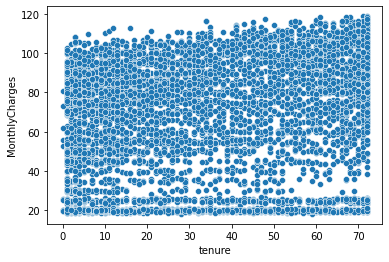

In [37]:
#visualize the data
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)

In [9]:
#Setup the correlation test
corr, p = stats.pearsonr(df.tenure, df.MonthlyCharges)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

In [15]:
if p < a:
    print("Reject the null hypothesis")
    print("Move forward with the understanding there is a correlation between monthly charges and tenure")
else:
    print("Fail to reject the null hypothesis.")
    print("N")

Reject the null hypothesis
Move forward with the understanding there is a correlation between monthly charges and tenure


 - **b. Total charges?**

In [23]:
#Clean the data to remove nulls
telco_churn = df[df.TotalCharges > 0]
telco_churn.sort_values(by="TotalCharges")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1654,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
6489,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
1151,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
4939,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
583,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


In [25]:
#Set the confidence interval for the correlation test
null_hypothesis = 'There is no correlation between tenure and total charges'
alt_hypothesis = 'There is a correlation between tenure and total charges'
confidence_int = .95
a = 1 - confidence_int

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

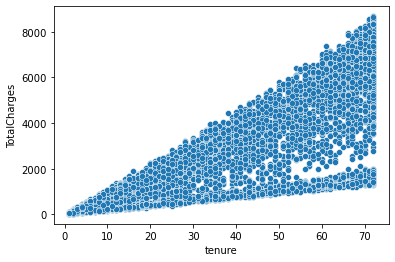

In [35]:
#visualize the data
sns.scatterplot(x='tenure', y='TotalCharges', data=telco_churn)

In [26]:
corr, p = stats.pearsonr(telco_churn.tenure, telco_churn.TotalCharges)
corr, p

(0.825880460933202, 0.0)

In [29]:
if p < a:
    print("Reject the null hypothesis")
    print("Move forward with the understanding there is a correlation between total charges and tenure")
else:
    print("Fail to reject the null hypothesis.")
    print("N")

Reject the null hypothesis
Move forward with the understanding there is a correlation between total charges and tenure


 - **c. What happens if you control for phone and internet service?**

In [47]:
r_tenure_phone_only = stats.pearsonr(telco_churn.tenure[(telco_churn.PhoneService == "Yes") & (telco_churn.InternetService == "No")], telco_churn.MonthlyCharges[(telco_churn.PhoneService == "Yes") & (telco_churn.InternetService == "No")])
r_tenure_phone_only

(0.34618773548574655, 4.896604599951957e-44)

In [49]:
r_tenure_internet_only = stats.pearsonr(telco_churn.tenure[(telco_churn.PhoneService == "No") & (telco_churn.InternetService != "No")], telco_churn.MonthlyCharges[(telco_churn.PhoneService == "No") & (telco_churn.InternetService != "No")])
r_tenure_internet_only

(0.5924298640568983, 1.1732739032891168e-65)

In [102]:
telco_churn['InternetService'] = 'Internet Service: ' + telco_churn['InternetService']
telco_churn['PhoneService'] = 'PhoneService: ' + telco_churn['PhoneService']
telco_churn['Internet_and_Phone'] = telco_churn['InternetService'] + telco_churn['PhoneService']

In [105]:
df['Internet_and_Phone'].value_counts()

KeyError: 'Internet_and_Phone'

In [98]:
x = {}
y = {}
control = ['InternetService', 'PhoneService', 'Internet_and_Phone']
for cntrl in control:
    for val in df[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['tenure'] = df['tenure'][df[cntrl]== val]
        y[val]['TotalCharges'] = df['TotalCharges'][df[cntrl]== val]
        y[val]['MonthlyCharges'] = df['MonthlyCharges'][df[cntrl]== val]

KeyError: 'Internet_and_Phone'

### Use the employees database.

In [50]:
from env import host, user, password

def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/employees'

In [91]:
sql = """
select *, datediff(CURDATE(), hire_date) as 'tenure'
from employees as emp
JOIN salaries using (emp_no)
JOIN titles using (emp_no)
"""

employees = pd.read_sql(sql, get_db_url('employees'))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01,12650
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,Senior Engineer,1986-06-26,9999-01-01,12650
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,Senior Engineer,1986-06-26,9999-01-01,12650
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,Senior Engineer,1986-06-26,9999-01-01,12650
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,Senior Engineer,1986-06-26,9999-01-01,12650


- Is there a relationship between how long an employee has been with the company and their salary?

Need to prepare data by: 
- Group data by emp_no so each employee only appears once
- Calculate employee tenure
    - Need to deal with to_dates for current employees

In [92]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638507 entries, 0 to 4638506
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   emp_no      int64 
 1   birth_date  object
 2   first_name  object
 3   last_name   object
 4   gender      object
 5   hire_date   object
 6   salary      int64 
 7   from_date   object
 8   to_date     object
 9   title       object
 10  from_date   object
 11  to_date     object
 12  tenure      int64 
dtypes: int64(3), object(10)
memory usage: 460.1+ MB


In [107]:
employees[employees.groupby('emp_no')]

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

- **Is there a relationship between how long an employee has been with the company and the number of titles they have had?**

### Use the sleepstudy data. Is there a relationship between days and reaction time?